In [20]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
data = pd.read_csv('./Fish.csv')
df = data.copy()
df.sample(10)

,Species,Weight,Length1,Length2,Length3,Height,Width
142,Smelt,6.7,9.3,9.8,10.8,1.7388,1.0476
99,Perch,180.0,23.0,25.0,26.5,6.4395,3.6835
11,Bream,500.0,28.7,31.0,36.2,14.3714,4.8146
9,Bream,500.0,28.5,30.7,36.2,14.2266,4.9594
74,Perch,40.0,13.8,15.0,16.0,3.8240,2.4320
78,Perch,78.0,16.8,18.7,19.4,5.1992,3.1234
105,Perch,250.0,25.4,27.5,28.9,7.2828,4.5662
30,Bream,920.0,35.0,38.5,44.1,18.0369,6.3063
16,Bream,700.0,30.4,33.0,38.3,14.8604,5.2854
146,Smelt,9.8,10.7,11.2,12.4,2.0832,1.2772


In [22]:
df.rename(columns= {'Length1':'LengthVer', 'Length2':'LengthDia', 'Length3':'LengthCro'}, inplace=True)
df.head()

,Species,Weight,LengthVer,LengthDia,LengthCro,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 7 columns):
Species      156 non-null object
Weight       156 non-null float64
LengthVer    156 non-null float64
LengthDia    156 non-null float64
LengthCro    156 non-null float64
Height       156 non-null float64
Width        156 non-null float64
dtypes: float64(6), object(1)
memory usage: 8.7+ KB


In [24]:
print(str('NaN value in the dataset: '), df.isnull().values.any())

NaN value in the dataset:  False


In [25]:
sp = df['Species'].value_counts()
sp = pd.DataFrame(sp)
sp

,Species
Perch,56
Bream,35
Roach,20
Pike,14
Smelt,14
Parkki,11
Whitefish,6


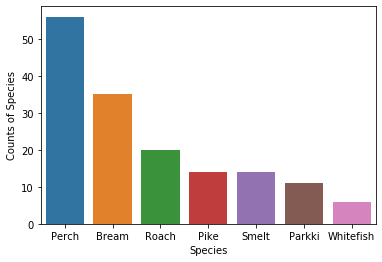

In [26]:
sns.barplot(x=sp.index, y=sp['Species']);
plt.xlabel('Species')
plt.ylabel('Counts of Species')
plt.show()

In [27]:
y = df['Weight']
X = df.iloc[:,2:7]

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [29]:
print('X_train: ', np.shape(X_train))
print('y_train: ', np.shape(y_train))
print('X_test: ', np.shape(X_test))
print('y_test: ', np.shape(y_test))

X_train:  (124, 5)
y_train:  (124,)
X_test:  (32, 5)
y_test:  (32,)


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
print('Model intercept: ', reg.intercept_)
print('Model coefficients: ', reg.coef_)

Model intercept:  -494.44085721886285
Model coefficients:  [ 62.41527657  -7.41179795 -31.06023916  26.90956775  42.23999841]


In [33]:
print('y = ' + str('%.2f' % reg.intercept_) + ' + ' + 
      str('%.2f' % reg.coef_[0]) + '*X1 ' + 
      str('%.2f' % reg.coef_[1]) + '*X2 ' +
      str('%.2f' % reg.coef_[2]) + '*X3 + ' + 
      str('%.2f' % reg.coef_[3]) + '*X4 + ' + 
      str('%.2f' % reg.coef_[4]) + '*X5')

y = -494.44 + 62.42*X1 -7.41*X2 -31.06*X3 + 26.91*X4 + 42.24*X5


In [34]:
print('y = ' + str('%.2f' % reg.intercept_) + ' + ' + 
      str('%.2f' % reg.coef_[0]) + str(input('x1=')) + 
      str('%.2f' % reg.coef_[1]) + str(input('x2=')) +
      str('%.2f' % reg.coef_[2]) + str(input('x3=')) + 
      str('%.2f' % reg.coef_[3]) + str(input('x4=')) + 
      str('%.2f' % reg.coef_[4]) + str(input('x5=')))

x1=1
x2=2
x3=3
x4=4
x5=5
y = -494.44 + 62.421-7.412-31.06326.91442.245


In [37]:
y = -494.44 + 62.42*float(input('x1=')) -7.41*float(input('x2=')) -31.06*float(input('x3=')) + 26.91*float(input('x4=')) + 42.24*float(input('x5='))
y

x1=1
x2=2
x3=3
x4=4
x5=5


-221.17999999999998

In [38]:
y_head = reg.predict(X_train)

In [39]:
r2_score(y_train, y_head)

0.8888919014691643

In [40]:
y_pred = reg.predict(X_test)

In [41]:
print(r2_score(y_test, y_pred))

0.8542092608109684


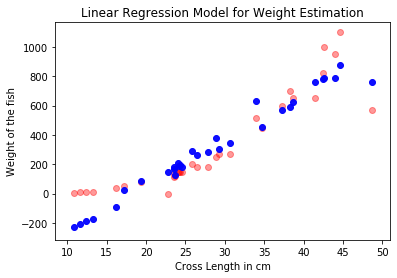

In [45]:
plt.scatter(X_test['LengthCro'], y_test, color='red', alpha=0.4)
plt.scatter(X_test['LengthCro'], y_pred, color='blue', alpha=0.94)
plt.xlabel('Cross Length in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');

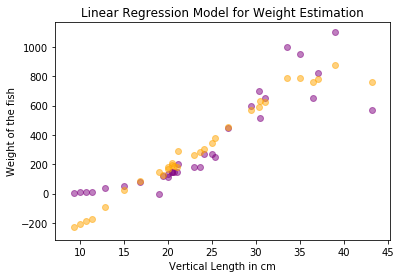

In [43]:
plt.scatter(X_test['LengthVer'], y_test, color='purple', alpha=0.5)
plt.scatter(X_test['LengthVer'], y_pred, color='orange', alpha=0.5)
plt.xlabel('Vertical Length in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');

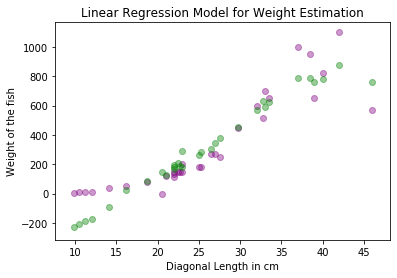

In [44]:
plt.scatter(X_test['LengthDia'], y_test, color='purple', alpha=0.4)
plt.scatter(X_test['LengthDia'], y_pred, color='green', alpha=0.4)
plt.xlabel('Diagonal Length in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');